# The prediction of show ups in Medical Appointment


A data analysis using Medical Appointment No Shows from Kaggle’s.

<img src='https://cdn.dribbble.com/users/420119/screenshots/4061538/calendar.png'></img>

## Introduction

Hspitals are the most important places in the city and have a lot of visitors, which leads to a traffic jam and irregular access to the doctor, the  service of making an appointment is the right decisions that will regulate the entry of visitors and arrange the time of doctors, and reduce waiting time for the patient to see her doctor, but there is a problem in the making an appointment , the problem is there is some people They make an appointment and they will not come on this date, which he has booked, causing wasted of doctor time and may wasting the opportunity to book this appointment by another patient, so we decide to choose a medical dataset to analyze the medical appointments and predict whether patient will show up at his medical appointment or not based on the dataset we have. 


This article describes Reducing the 'no-show' rate of medical appointments at clinics and hospitals of all sizes is very beneficial to these organizations in both the short and long term, as it allows them to operate more efficiently and profitably. Even a low 'no-show' rate is considered an issue to medical organizations, and management often adopt different mechanisms and techniques to minimize it constantly. 

There is problem in make medical appointment. The many patient takes appointments and then not comes for it. The doctor will have an empty time where another patient maybe come on it.

For this, we are going to use data from Kaggle’s Medical Appointment No Shows.

## 1. Framework Understanding

I will focus on the three question below:



Q1: A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

Q2: What's the ratio of SMS_received / Gender？Which are the most showing up ？

Q3: Is there a relationship between the neighborhood and showing up ?

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


## 2.  Data Understanding


### 2.1 Gather

First, we provide a general view to our data.

In [2]:
# load dataset
no_show_df = pd.read_csv('KaggleV2-May-2016.csv')
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2.2 Assess

In [3]:
# What kind information is provied?
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# data format for each column
no_show_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### 2.3 Check missing values

In [5]:
# missing values
no_show_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In our dataset, there is no missing values. 

## 3. Prepare Data
There are some necessary stpes to apply before continue exploring the dataset:

* Drop unused columns

* Convert string values to number 

* Create a new column if need

### 3.1 Gather necessary data to answer your questions

In our dataset we have a lot of attributes and didn't have important value, so we use the Select attribute to remove unimportant attributes like (PatientId,AppointmentID,DataMarcacaoConsulta,Neighbourhood, Scholarship, hypertension, Diabetes, Alcoholism and Handcap).
We have a lot of record which is so difficult to do our analysis in this data, so we take a small sample to represent the whole data set.


In [6]:
# Drop unused columns
columns_to_drop = [ 'AppointmentID','AppointmentDay', 'ScheduledDay','Scholarship', 
                   'Diabetes', 'Alcoholism', 'Handcap','Hipertension']
no_show_df=no_show_df.drop(columns_to_drop, axis=1)


In [7]:
no_show_df.head()

,PatientId,Gender,Age,Neighbourhood,SMS_received,No-show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,No


### 3.2 Analyze

let's have a quick look on their Age status and how they varied.

In [8]:
def display_bar_chart(no_show_df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    no_show_df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
   '''
    

    vals= no_show_df[column].value_counts()
    
    (vals[:15]/no_show_df.shape[1]).plot(kind="bar");
   
    plt.title(title);


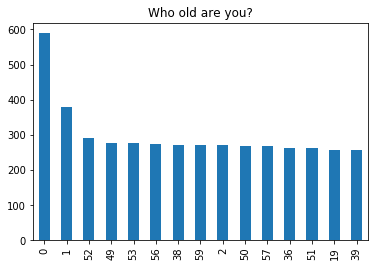

In [9]:
#Provide a pandas series of the counts for each Age status
display_bar_chart(no_show_df, "Age", "Who old are you?")

# save the figure
plt.savefig('AgePlot.png', dpi=300, bbox_inches='tight')

The features 'Age' has differentiation on dataset. let's check on their Gender status and how are the most.

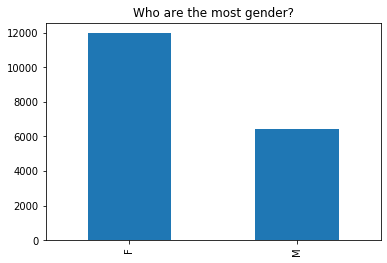

In [10]:
#Provide a pandas series of the counts for each Gender status
display_bar_chart(no_show_df, "Gender", "Who are the most gender?")

# save the figure
plt.savefig('GenderPlot.png', dpi=300, bbox_inches='tight')

The plot shown numbers of Female is greater than male. 

### 3.2 Data preparation

For categorical variables "No-show", we seperate them into three sectors: Yes, No and other. The following code define the lists of related no-show and create a new column to identify whether that person showing up or not.

In [11]:
def handling_no_show(no_show_df):
    '''
    
    Return a dataframe with No-show seperate into Yes and No
    
    Parameters:
    no_show_df: a raw data dataframe
    
    Returns:
    no_show_df: a dataframe with a new column yes_or_no
    
    '''
    # For Categorical variables "No-show", we seperate them into 
    # three sessions: Yes, No and other
    # The following lists define the No-show  to Showing and NotShowing
    Showing= ['Yes']

    NotShowing = ['No']
    
    #Add a new catagory seperating to  Showing and NotShowing
    no_show_df['Showing_or_NotShowing'] = no_show_df['No-show'].apply(lambda x: 'Showing' if x in Showing else ('NotShowing' if x in NotShowing else 'other'))
    
    return no_show_df

In [12]:
#Get some useful columns for analysis
no_show_df =handling_no_show(no_show_df)
no_show_df.head(10)

,PatientId,Gender,Age,Neighbourhood,SMS_received,No-show,Showing_or_NotShowing
0,2.987250e+13,F,62,JARDIM DA PENHA,0,No,NotShowing
1,5.589978e+14,M,56,JARDIM DA PENHA,0,No,NotShowing
2,4.262962e+12,F,62,MATA DA PRAIA,0,No,NotShowing
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,No,NotShowing
4,8.841186e+12,F,56,JARDIM DA PENHA,0,No,NotShowing
5,9.598513e+13,F,76,REPÚBLICA,0,No,NotShowing
6,7.336882e+14,F,23,GOIABEIRAS,0,Yes,Showing
7,3.449833e+12,F,39,GOIABEIRAS,0,Yes,Showing
8,5.639473e+13,F,21,ANDORINHAS,0,No,NotShowing
9,7.812456e+13,F,19,CONQUISTA,0,No,NotShowing


## 4. Answer Questions base on dataset
In this section, we will display the findings and discuss about it.

### 1. A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

In [13]:
comparison = no_show_df.groupby('Showing_or_NotShowing').count()
comparison

,PatientId,Gender,Age,Neighbourhood,SMS_received,No-show
Showing_or_NotShowing,,,,,,
NotShowing,88208,88208,88208,88208,88208,88208
Showing,22319,22319,22319,22319,22319,22319


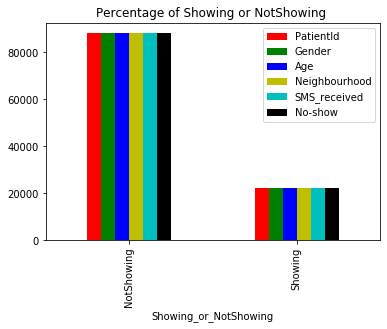

In [14]:

comparison.plot(kind='bar', color='r''g''b''y''c''k')
plt.title('Percentage of Showing or NotShowing ')

# save the figure
plt.savefig('Percentage of Showing or NotShowingPlot.png', dpi=300, bbox_inches='tight')

Based on the numbers which mean that the probability patient Don't showing up is bigger than the probability of a patient showing up.


### 2. What's the ratio of  SMS_received / Gender？Which are the most showing up ？



Some patients receive a SMS reminder before their medical appointment. ‘0’, and ‘1’. is the number of reminders the patient has received.

In [15]:
comparison = no_show_df.groupby(['Showing_or_NotShowing','Gender']).count()
comparison

PatientId    Age  Neighbourhood  SMS_received  \
Showing_or_NotShowing Gender                                                  
NotShowing            F           57246  57246          57246         57246   
                      M           30962  30962          30962         30962   
Showing               F           14594  14594          14594         14594   
                      M            7725   7725           7725          7725   

                              No-show  
Showing_or_NotShowing Gender           
NotShowing            F         57246  
                      M         30962  
Showing               F         14594  
                      M          7725

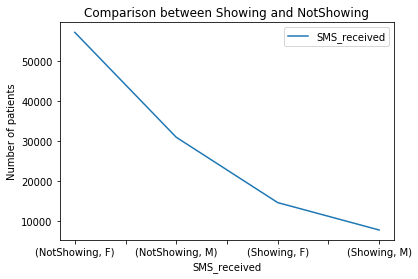

In [16]:
#Plot the SMS_received Comparison between Showing and NotShowing
comparison['SMS_received'].plot(legend=True)
plt.title("Comparison between Showing and NotShowing");
plt.xlabel('SMS_received')
plt.ylabel('Number of patients')

# save the figure
plt.savefig('Comparison between Showing and NotShowingPlot.png', dpi=300, bbox_inches='tight')

As Shown in plot number of patient who are receive a SMS reminder and not showing more than who are showing up for both Female and male, even they receive before their medical appointment. 


### 3. Is there a relationship between the neighborhood and showing up ? 

let's have a quick look on their Neighbourhood status and exploration if it's realted or not.

In [17]:
no_show_df.groupby(['Showing_or_NotShowing','Neighbourhood']).count()

PatientId  Gender   Age  \
Showing_or_NotShowing Neighbourhood                                  
NotShowing            AEROPORTO                    7       7     7   
                      ANDORINHAS                1741    1741  1741   
                      ANTÔNIO HONÓRIO            221     221   221   
                      ARIOVALDO FAVALESSA        220     220   220   
                      BARRO VERMELHO             332     332   332   
...                                              ...     ...   ...   
Showing               SÃO JOSÉ                   428     428   428   
                      SÃO PEDRO                  515     515   515   
                      TABUAZEIRO                 573     573   573   
                      UNIVERSITÁRIO               32      32    32   
                      VILA RUBIM                 141     141   141   

                                           SMS_received  No-show  
Showing_or_NotShowing Neighbourhood                               
NotShowing            AEROPORTO                       7        7  
                      ANDORINHAS                   1741     1741  
                      ANTÔNIO HONÓRIO               221      221  
                      ARIOVALDO FAVALESSA           220      220  
                      BARRO VERMELHO                332      332  
...                                                 ...      ...  
Showing               SÃO JOSÉ                      428      428  
                      SÃO PEDRO                     515      515  
                      TABUAZEIRO                    573      573  
                      UNIVERSITÁRIO                  32       32  
                      VILA RUBIM                    141      141  

[160 rows x 5 columns]

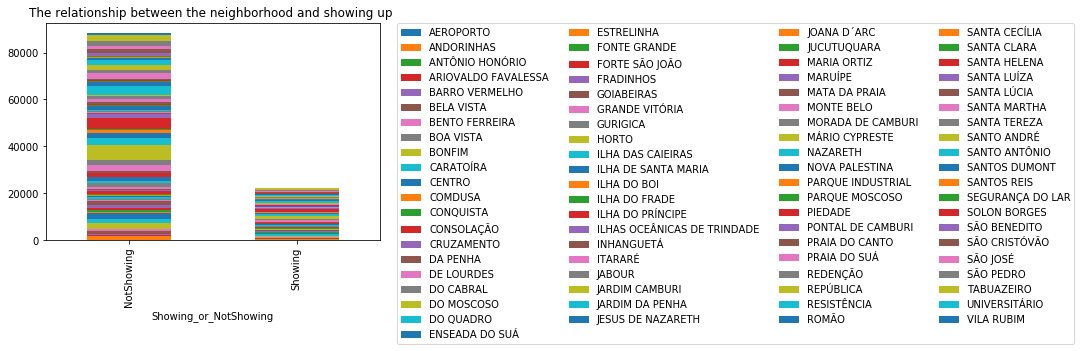

<Figure size 432x288 with 0 Axes>

In [18]:
#Plot the SMS_received Comparison between Showing and NotShowing

no_show_df.groupby(['Showing_or_NotShowing','Neighbourhood']).size().unstack().plot(kind='bar',stacked=True)

#plt.legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=4, borderaxespad=0.)

#plt.Title
plt.title('The relationship between the neighborhood and showing up ')

#plt.show()
plt.show()

# save the figure
plt.savefig('The relationship between the neighborhood and showing upPlot.png', dpi=300, bbox_inches='tight')

Depending on the neighborhood in data set the no-show appointment, there is  more than 88208 not showing up and 22319 for showing.

## Conclusion

The purpose of this project was to predict if a patient will show up at his medical appointment or not.
During the data analysis, the tests showed that these values significantly differ from each other. Despite the fact that the data
is imbalanced (80% show up and 20% no shows).

## References

Medical Appointment No Shows Data: https://www.kaggle.com/joniarroba/noshowappointments <br>
